In [1]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt

Using backend: tensorflow.compat.v1

2023-05-05 15:25:23.805479: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
non-resource variables are not supported in the long term


2023-05-05 15:26:24.212000: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-05 15:26:26.523364: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-05 15:26:26.524130: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Enable just-in-time compilation with XLA.




In [2]:
L = 2
nx = 3
ny = 2

In [3]:
def psi(x, n):
    k = (n * np.pi) / L
    normalization_constant = np.sqrt(2.0 / L)
    return normalization_constant * np.sin(k * (x + 0.5 * L))

In [4]:
def psi_2d_rectangle(x):
    x_component = psi(x[:, 0:1], nx)
    y_component = psi(x[:, 1:2], ny)
    return x_component * y_component

In [5]:
domain = dde.geometry.Rectangle([-L / 2, -L / 2], [L / 2, L / 2])

In [6]:
num_train = 16 ** 2
num_test = 100 ** 2
data = dde.data.Function(domain, psi_2d_rectangle, num_train, num_test)

In [7]:
activation = 'tanh'
initializer = 'Glorot uniform'
net = dde.nn.FNN([2] + [20] * 5 + [1], activation, initializer)

In [8]:
model = dde.Model(data, net)
model.compile('adam', lr=0.001, metrics=['l2 relative error'])

Compiling model...
Building feed-forward neural network...


/home/piotr/repos/quant-chem-pinns/venv/lib/python3.10/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:114: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'build' took 1.322871 s



2023-05-05 15:27:38.537358: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-05 15:27:38.537852: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-05 15:27:38.538268: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

'compile' took 17.800833 s



2023-05-05 15:27:54.815261: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-05 15:27:54.816085: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-05 15:27:54.816820: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [9]:
loss_history, train_state = model.train(iterations=10000)

Initializing variables...


2023-05-05 15:28:18.349376: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled


Training model...



2023-05-05 15:28:20.926963: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f21c000db80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-05 15:28:20.927061: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce 940MX, Compute Capability 5.0
2023-05-05 15:28:22.015490: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-05 15:28:35.370538: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8900
2023-05-05 15:28:47.386830: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Step      Train loss    Test loss     Test metric   
0         [3.96e-01]    [4.21e-01]    [1.31e+00]    
1000      [1.51e-03]    [9.24e-04]    [6.14e-02]    
2000      [8.79e-04]    [5.27e-04]    [4.64e-02]    
3000      [6.45e-04]    [3.69e-04]    [3.88e-02]    
4000      [4.83e-04]    [2.71e-04]    [3.33e-02]    
5000      [3.72e-04]    [2.14e-04]    [2.96e-02]    
6000      [2.88e-04]    [1.72e-04]    [2.65e-02]    
7000      [2.31e-04]    [1.43e-04]    [2.42e-02]    
8000      [1.93e-04]    [1.27e-04]    [2.27e-02]    
9000      [1.49e-04]    [9.56e-05]    [1.98e-02]    
10000     [1.25e-04]    [8.27e-05]    [1.84e-02]    

Best model at step 10000:
  train loss: 1.25e-04
  test loss: 8.27e-05
  test metric: [1.84e-02]

'train' took 42.104296 s



Saving loss history to /home/piotr/repos/quant-chem-pinns/potential-well/2d/rectangle/loss.dat ...
Saving training data to /home/piotr/repos/quant-chem-pinns/potential-well/2d/rectangle/train.dat ...
Saving test data to /home/piotr/repos/quant-chem-pinns/potential-well/2d/rectangle/test.dat ...


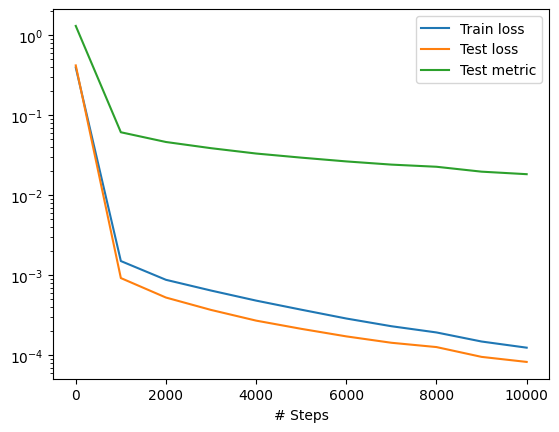

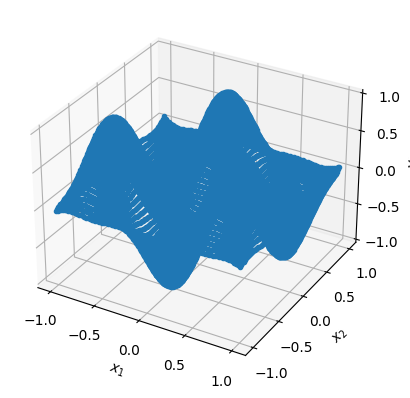

In [10]:
dde.saveplot(loss_history, train_state, issave=True, isplot=True)

In [17]:
def diff_function(x):
    model_value = model.predict(x)
    true_value = psi_2d_rectangle(x)
    return model_value - true_value

In [18]:
diff_function(np.array([[0.0, 0.0], [1.0, 0.0]]))

array([[ 0.00475939],
       [-0.00271026]])

In [19]:
def plot_2d_map(plotted_function, grid_dist=0.01):
    x_ax = np.arange(-L / 2, L / 2, grid_dist)
    y_ax = np.arange(-L / 2, L / 2, grid_dist)
    grid_x, grid_y = np.meshgrid(x_ax, y_ax)
    
    diff_list = []
    for a, b in zip(grid_x, grid_y):
        pair_list = []
        for x, y in zip(a, b):
            pair_list.append([x, y])
        pairs = np.array(pair_list)
        diff_list.append(np.squeeze(plotted_function(pairs)))

    diff_list = np.array(diff_list)
    
    im = plt.imshow(diff_list, cmap=plt.cm.RdBu)
    plt.colorbar(im)

    plt.show()

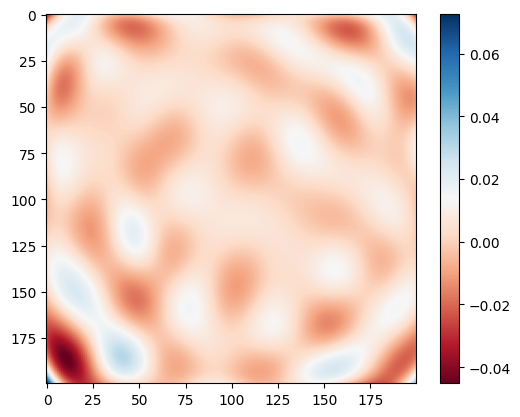

In [20]:
plot_2d_map(diff_function)

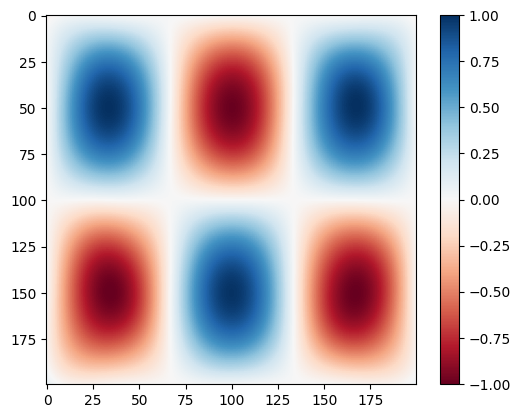

In [21]:
plot_2d_map(model.predict)

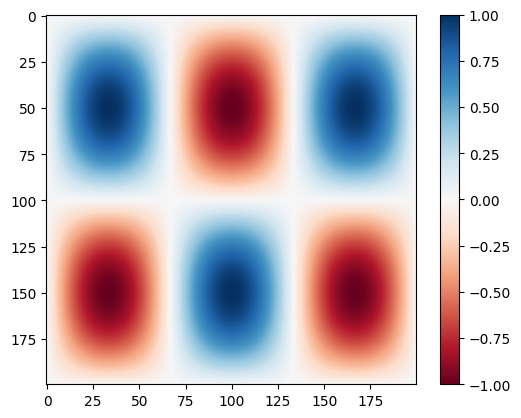

In [22]:
plot_2d_map(psi_2d_rectangle)